In [ ]:
location = ("prices-split-adjusted.csv")
location2 = ("Ask_n_bid/securities.csv")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at content


In [ ]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.read_csv(location)

In [ ]:
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']
data = df.sort_index(ascending = True, axis = 0)

unique_symbols = sorted(df['symbol'].unique())
symbol_dfs = []
count = 0
for i in unique_symbols:
    symbol_df = df.loc[df['symbol'] == i]
    #print(count,len(symbol_df)) 
    symbol_dfs.append(symbol_df)
    count += 1
    if i == "MUR":
      save = count

    

In [ ]:
ti = symbol_dfs[save]
ti = ti.drop('date',axis = 1)



ADDING SMA (SIMPLE MOVING AVERAGE)


In [ ]:
ti['SMA_10'] = (sum(ti.close,10))/10
ti['SMA_20'] = (sum(ti.close,20))/20
ti['SMA_50'] = (sum(ti.close,50))/50
ti['SMA_100'] = (sum(ti.close,100))/100
ti['SMA_200'] = (sum(ti.close,200))/200

ADDING EMA (Exponential moving average)

In [ ]:
ti['ema_10'] = ti.close.ewm(span=10).mean().fillna(0)
ti['ema_20'] = ti.close.ewm(span=20).mean().fillna(0)
ti['ema_50'] = ti.close.ewm(span=50).mean().fillna(0)
ti['ema_100'] = ti.close.ewm(span=100).mean().fillna(0)
ti['ema_200'] = ti.close.ewm(span=200).mean().fillna(0)

In [ ]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib


Selecting previously unselected package libta-lib0.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 266kB 2.9MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.18-cp36-cp36m-linux_x86_64.whl size=1531837 sha256=153cbf0545adc2ecdf3aaee5ad5baa335caf11ae47cffaf5d34cdb7573ea3586
  Stored in directory: /root/.cache/pip/wheels/11/cc/88/20dc42c28a07efb297dad4303948ef6dd4a3c7257553db8f09
Successfully built ta-lib


Adding ATR(AVERAGE TRUE RANGE)

In [ ]:
import talib
ti["ATR"] = talib.ATR(ti['high'].values, 
                      ti['low'].values, 
                      ti['close'].values,
                      timeperiod =14)

Adding ADX (Average Directional index)


In [ ]:
ti['ADX'] = talib.ADX(ti.high,ti.low,ti.close,timeperiod = 14)

CCI (Commodity Chanel Index)

In [ ]:
tp = (ti['high'] + ti['low'] + ti['close'])/3
ma = tp/20
md = (tp-ma)/20
ti["CCI"] = (tp-ma)/(0.015*md)

Rate of Change (ROC)

In [ ]:
ti['ROC'] = ((ti['close'] - ti['close'].shift(12))/ (ti['close'].shift(12)))*100

Relative Strength Index(RSI)

In [ ]:
ti['RSI'] = talib.RSI(ti.close.values,timeperiod = 14)

William%R

In [ ]:
ti['Williams%R'] = talib.WILLR(ti.high.values,
                               ti.low.values,
                               ti.close.values,14)

Stochastic%K

In [ ]:
ti['SO%K'] = ((ti['close']- ti['low'])/(ti['high']- ti['low']))

In [ ]:
ti = ti.dropna()
symb = ti['symbol'][0]
ti.head()
print("DATSET OF {} HAS {} SAMPLES AND {} FEATURES".format(symb, ti.shape[0],ti.shape[1]-1))

DATSET OF MYL HAS 1735 SAMPLES AND 22 FEATURES


In [ ]:
ti = ti.drop('symbol',axis = 1)

In [ ]:
train = ti[:int(len(ti)*0.7)]
valid = ti[int(len(ti)*0.7):]

x_train = train.drop('close', axis= 1)
y_train = train['close']

x_valid = valid.drop('close', axis = 1)
y_valid = valid['close']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)



In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
preds = model.predict(x_valid)
preds2 = model.predict(x_train)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms2=np.sqrt(np.mean(np.power((np.array(y_train)-np.array(preds2)),2)))
print(rms,rms2)

17.815937616063803 0.14936871574142307


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


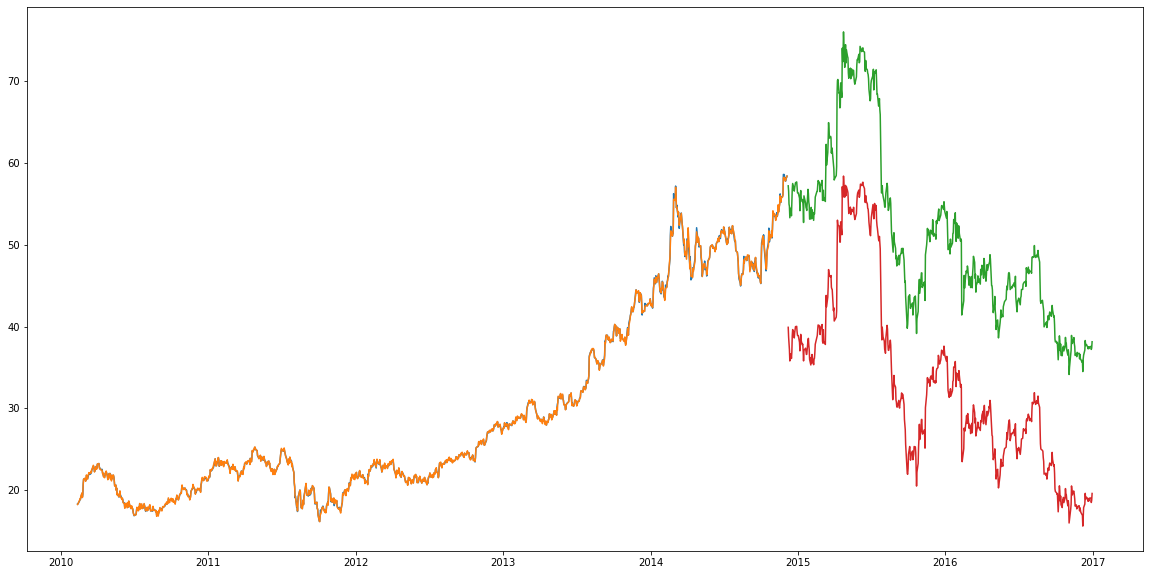

In [ ]:
valid['predictions'] = preds
train['predictions'] = preds2
train.index = ti[:int(len(ti)*0.7)].index
valid.index = ti[int(len(ti)*0.7):].index


plt.plot(train[['close','predictions']])
plt.plot(valid[['close', 'predictions']])

16.805945253086144 0.5544606886869117


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


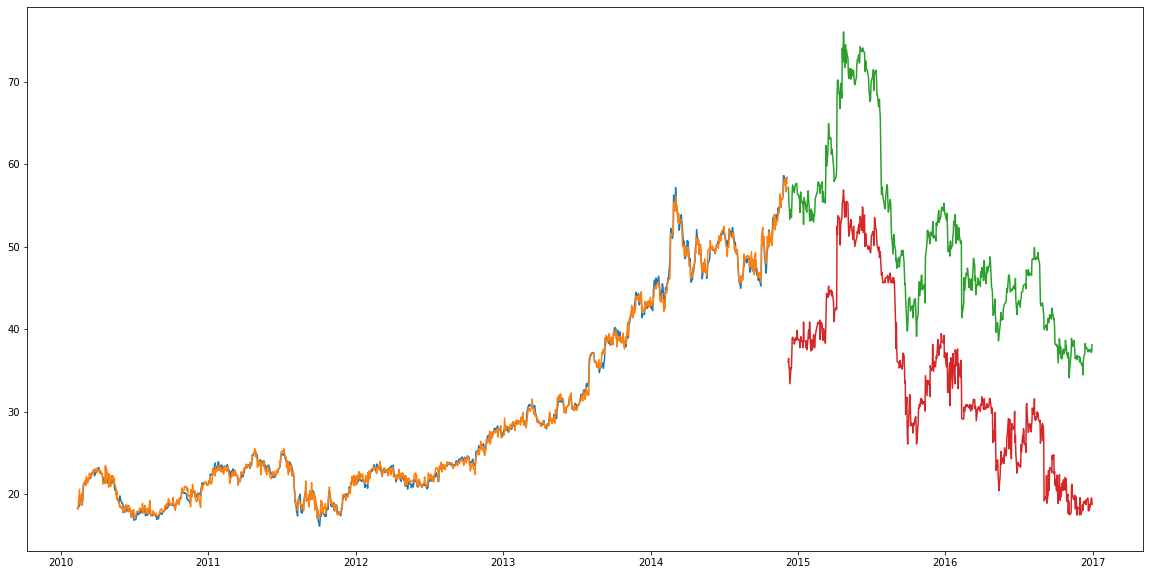

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn,params,cv =5)
model.fit(x_train,y_train)
preds = model.predict(x_valid)
preds2 = model.predict(x_train)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms2=np.sqrt(np.mean(np.power((np.array(y_train)-np.array(preds2)),2)))
print(rms,rms2)
valid['predictions'] = preds
train['predictions'] = preds2
train.index = ti[:int(len(ti)*0.7)].index
valid.index = ti[int(len(ti)*0.7):].index


plt.plot(train[['close','predictions']])
plt.plot(valid[['close', 'predictions']])